In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def mapp(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

In [3]:
image=cv2.imread("test_img.jpg")   #read in the image
image=cv2.resize(image,(1300,800)) #resizing because opencv does not work well with bigger images
orig=image.copy()

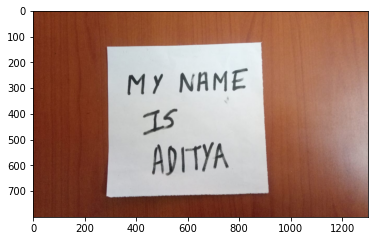

In [4]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

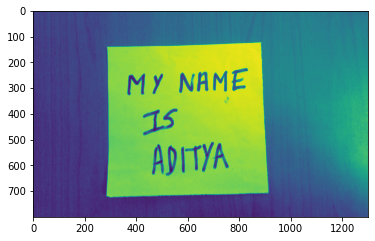

In [5]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
plt.subplot(1, 1, 1)
plt.imshow(gray)
plt.show()

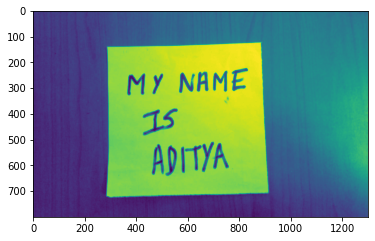

In [6]:
blurred=cv2.GaussianBlur(gray,(5,5),0)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur
plt.subplot(1, 1, 1)
plt.imshow(blurred)
plt.show()

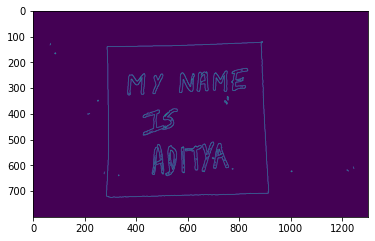

In [7]:
edged=cv2.Canny(blurred,30,50)  #30 MinThreshold and 50 is the MaxThreshold
plt.subplot(1, 1, 1)
plt.imshow(edged)
plt.show()

In [8]:
_,contours,hierarchy=cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model
contours=sorted(contours,key=cv2.contourArea,reverse=True)

In [9]:
#the loop extracts the boundary contours of the page
for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)

    if len(approx)==4:
        target=approx
        break

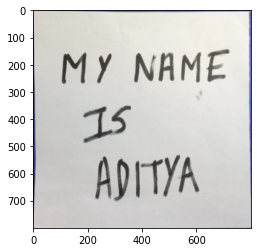

In [10]:
approx=mapp(target) #find endpoints of the sheet
pts=np.float32([[0,0],[800,0],[800,800],[0,800]])  #map to 800*800 target window

op=cv2.getPerspectiveTransform(approx,pts)  #get the top or bird eye view effect

dst=cv2.warpPerspective(orig,op,(800,800))

#cv2.imwrite('a.jpeg',dst)
plt.subplot(1, 1, 1)
plt.imshow(dst)
plt.show()